Compare Insitu Data from Rich with Model Results

In [1]:
import arrow
import datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

\begin{tabular}{c c l}
Year & Half-height Bloom period & Nominal Level \\ \hline
2003 & 03/25 - 04/25 & 14   \\
2004 & 03/13 - 03/31 & 17 \\
2005 & 02/26 - 03/08 & 36\\ 
2006 & 03/27 - 04/07 & 27\\
2007 & 04/03 - 04/19 & 37\\
2008 & 03/10 - 03/23 & 18\\
2009 & 02/21 - 04/11 & Limits only\\
2010 & 03/18 - 04/01 & 13\\ 
2011 & 04/08 - 05/17 & Limits only\\
2012 & 03/00 - 05/10 & Estimated\\
2013 & 03/26 - 04/20 &  4\\
2014 & 04/01 - 04/21 &  5\\
2015 & 03/06 - 03/16 & 10\\
2016 & 03/19 - 03/29 & 3.5\\ 
2017 & 03/18 - 03/28 & 12 \\
2018 & 03/09 - 03/20 & 9  \\ 
2019 & 03/11 - 03/29 & 7.3 \\
2020 & 03/07 - 03/28 & 10\\ \hline
Mean (-2017) & 03/18 - 04/03
\end{tabular}

In [2]:
Chldates=[
[2003, 3, 25,   2003, 4, 25,   14],
[2004, 3, 13,   2004, 3, 31,   17],
[2005, 2, 26,   2005, 3, 8,   36],
[2006, 3, 27,   2006, 4, 7,   27],
[2007, 4, 3,   2007, 4, 19,   37*.5],
[2008, 3, 10,   2008, 3, 23,   18*.5],
[2009, 2, 21,   2009, 4, 11,    0*.5],
[2010, 3, 18,   2010, 4, 1,   13*.5],
[2011, 4, 8,   2011, 5, 17,    0*.5],
[2012, 2, 29,   2012, 5, 10,    0*1.5],
[2013, 3, 26,   2013, 4, 20,    4*1.5],
[2014, 4, 1,   2014, 4, 21,    5*1.5],
[2015, 3, 6,   2015, 3, 16,   10*1.5],
[2016, 3, 18,  2016, 3, 29, 3.5*1.5],
[2017, 3, 18,  2017, 3, 28, 12*1.5 ],
[2018, 3, 9, 2018, 3, 20, 9*1.5],
[2019, 3, 11, 2019, 3, 29, 7.3*1.5],
[2020, 3, 7, 2020, 3, 28, 10*1.5],
[2021, 3, 26, 2021, 4, 18, 0]] 
rich = np.array(Chldates)
length = rich.shape[0]
startdates, enddates = [],[]
for year in Chldates:
    startdates.append(arrow.get(*year[:3]))
    enddates.append(arrow.get(*year[3:6]))

print (enddates[0])

2003-04-25T00:00:00+00:00


In [3]:
int(arrow.get('2016-02-20').format('DDD'))

51

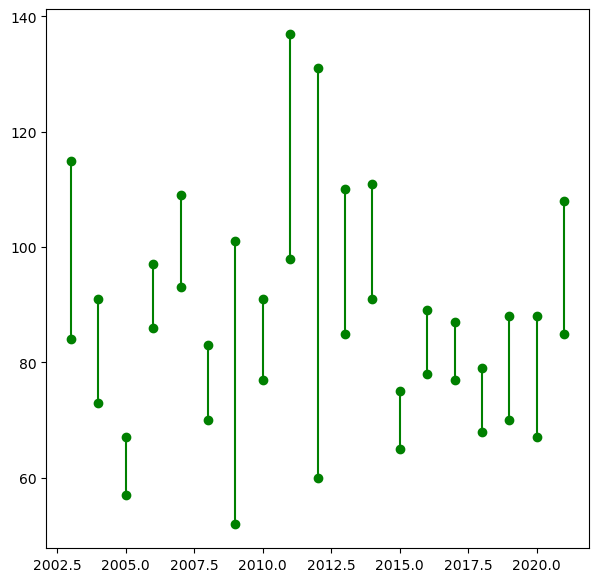

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7, 7))
for iyear in range(length):
    ax.plot((rich[iyear,0], rich[iyear,0]), 
            (int(startdates[iyear].format('DDD')), int(enddates[iyear].format('DDD'))),'o-g')

### SalishSeaCast 2019-05

In [5]:
SSC = [[2007, 4, 19],
      [2008, 4, 16],
      [2009, 4, 19],
      [2010, 4, 19],
      [2011, 5, 5],
      [2012, 4, 25],
      [2013, 4, 4],
      [2014, 4, 8], # 8th strictly applying the nitrate requirement at S3, otherwise the 3rd
      [2015, 4, 3],
      [2016, 4, 4],
      [2017, 4, 22],
      [2018, 3, 25],
      [2019, 3, 28],
      [2020, 4, 10],
      ]
SSCdates = []
for year in SSC:
    SSCdates.append(arrow.get(*year[:3]))
print (len(SSCdates))
print (len(SSC[0]))

14
3


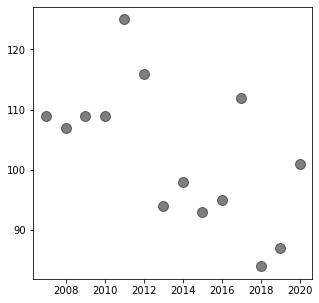

In [6]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
for iyear in range(len(SSCdates)):
    ax.plot(SSC[iyear][0], int(SSCdates[iyear].format('DDD')), 'o-k', markersize=10, alpha=0.5)

In [5]:
Model = np.loadtxt('/ocean/sallen/allen/research/sog/Hindcasts/bloomdates_29feb2024.dat', 
skiprows=4)
#Model = np.loadtxt('bloomdates_29mar2019.dat', skiprows=4)
print (Model.shape)
mlength = Model.shape[0]
print (Model[-1])

(56, 2)
[2023.   77.]


84.76785714285714 10.569482808384462
1991.0 2022.0
84.375 12.287569938763319


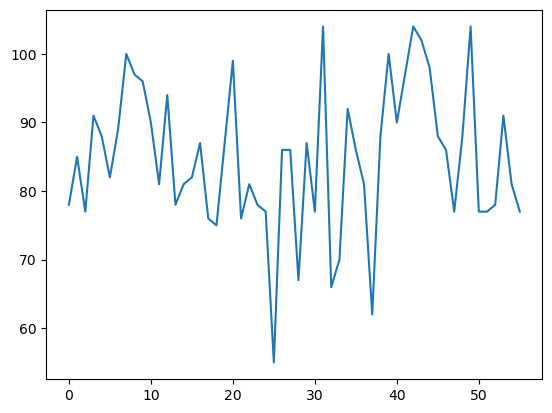

In [6]:
plt.plot(Model[:,1])
print (Model[:, 1].mean(), Model[:, 1].std())
print (Model[23, 0], Model[-2, 0])
print (Model[23:-1, 1].mean(), Model[23:-1, 1].std())

13.5
[77. 86. 91.]
[77.   86.   91.25]
[1975. 1976. 1977. 1980. 1988. 1999. 2002. 2007. 2009. 2010. 2011. 2012.
 2017.]


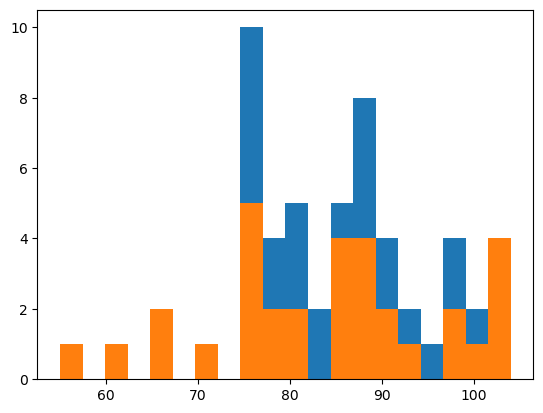

In [7]:
print (54/4)
plt.hist(Model[:, 1], bins=20)
plt.hist(Model[23:-1, 1], bins=20 )
print (np.quantile(Model[:, 1], [0.25, 0.5, 0.75]))
print (np.quantile(Model[23:-1, 1], [0.25, 0.5, 0.75]))
print (Model[Model[:, 1] > 91] [:, 0])

In [8]:
delta = Model[1:, 1] - Model[:-1, 1]

[-8.5 -1.   9. ]
[-10.   7.   7.  -2.  -4. -10.  -2.  -9.  11.  16. -27.   0.   1.  13.
 -10.  -4.]
[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023.]


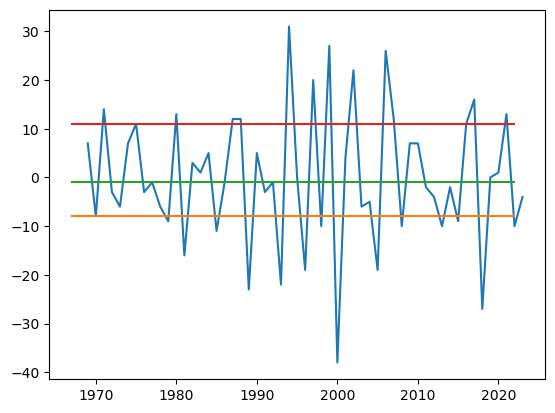

In [9]:
plt.plot(Model[1:, 0], delta)
plt.plot([1967, 2022], [-8, -8])
plt.plot([1967, 2022], [-1, -1])
plt.plot([1967, 2022], [11, 11])
print (np.quantile(delta, [0.25, 0.5, 0.75]))
print (delta[-16:])
print (Model[-16:, 0])

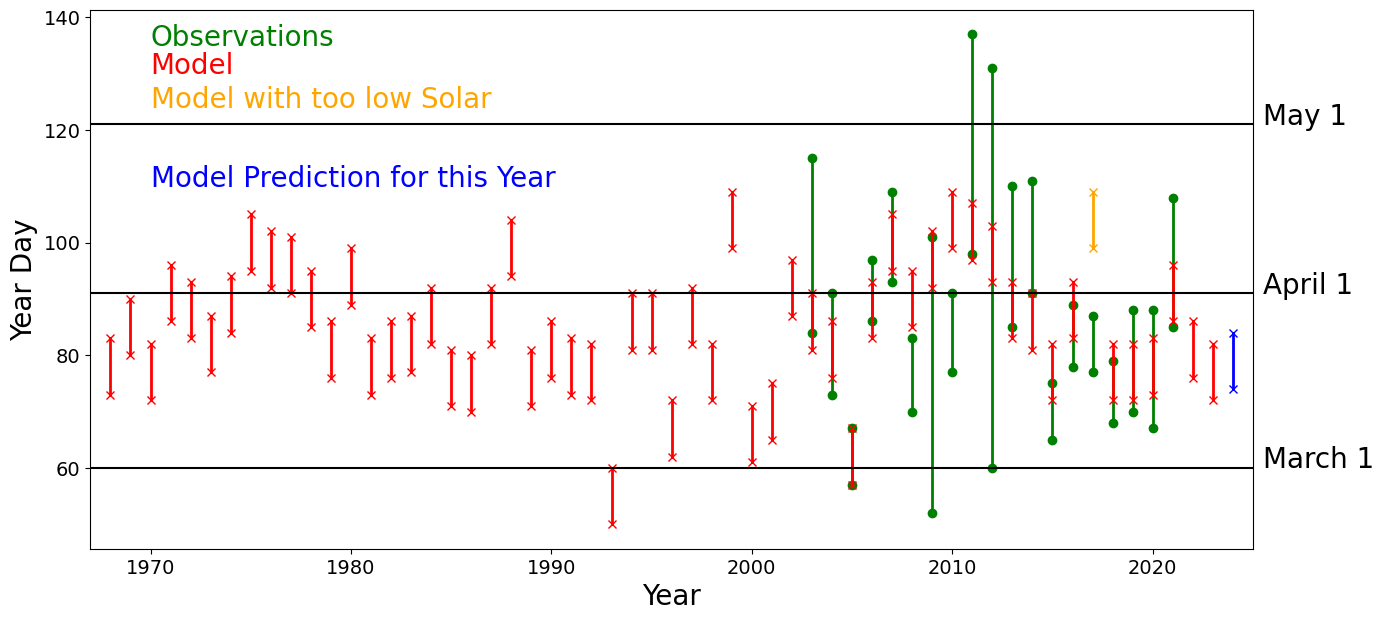

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
for iyear in range(length):
    ax.plot((rich[iyear,0], rich[iyear,0]),            
            (int(startdates[iyear].format('DDD')), int(enddates[iyear].format('DDD'))),
            'o-g', linewidth=2)
for ii in range(mlength):
    if (Model[ii,0] != 2017):
        ax.plot((Model[ii,0], Model[ii,0]), (Model[ii,1]-5, Model[ii,1]+5), 'x-r', 
                linewidth=2)
    else:
        ax.plot((Model[ii,0], Model[ii,0]), (Model[ii,1]-5, Model[ii,1]+5), 'x-', color='orange', linewidth=2)

ax.plot((2024, 2024), (74, 84), 'x-b', linewidth=2)  # March 19, 2024 = 79

tstart = 1967; tend = 2025
ax.set_xlim((tstart, tend))
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_ylabel('Year Day', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.text(1970, 135,'Observations', color='g', fontsize=20)
ax.text(1970, 130,'Model', color='r', fontsize=20)
ax.text(1970, 124, 'Model with too low Solar', color='orange', fontsize=20)
ax.text(1970, 110, 'Model Prediction for this Year', color='b', fontsize=20)

ax.plot((tstart, tend), (60,60), 'k')
ax.text(tend+0.5, 60, 'March 1', fontsize=20)
ax.plot((tstart, tend), (91, 91), 'k')
ax.text(tend+0.5, 91, 'April 1', fontsize=20)
ax.plot((tstart, tend), (121, 121), 'k')
ax.text(tend+0.5, 121, 'May 1', fontsize=20);

fig.savefig('springbloom_2024_w2024.png', dpi=600)

In [10]:
print (Model[:, 1].mean())
print (Model[:, 1].std()/np.sqrt(Model.shape[0]))
print (Model.shape[0])

84.86792452830188
1.4787055561010252
53


In [39]:
print (np.array(int(startdates[:].format('DDD'))).mean())
print (np.array(int(enddates[:].format('DDD'))).mean())

AttributeError: 'list' object has no attribute 'format'

In [50]:
SSCday = np.ones((13))
for ii, iy in enumerate(SSCdates):
    SSCday[ii] = iy.format('DDD')
print (SSCday)
print (SSCday.mean())
print (SSCday.std())

[109. 107. 109. 109. 125. 116.  94.  98.  93.  95. 112.  84.  87.]
102.92307692307692
11.585544962193445


In [53]:
print (Model[-13:, 0])
print (Model[-13:, 1].mean())
print (Model[-13:, 1].std())

[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.
 2019.]
91.38461538461539
9.825699908822012


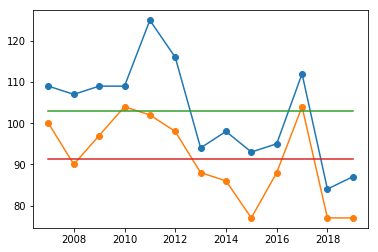

In [61]:
plt.plot(Model[-13:, 0], SSCday, 'o-')
plt.plot(Model[-13:, 0], Model[-13:, 1], 'o-')
plt.plot(Model[-13:, 0], np.ones(13)*SSCday.mean())
plt.plot(Model[-13:, 0], np.ones(13)*Model[-13:, 1].mean())

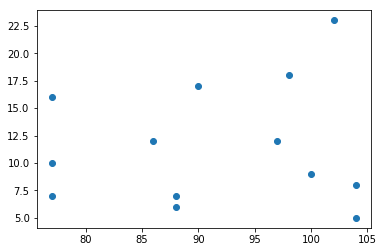

In [64]:
plt.plot(Model[-13:, 1], SSCday-Model[-13:, 1], 'o')